In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing

In [2]:
directory = r'C:\Users\caiqu\Documents\Caique Jupyter Notebook\Project'

# the file we want to import has lines with too many fields (commas), so we use <on_bad_lines='skip'> to skip bad lines without raising or warning when they are encountered.

books = pd.read_csv(directory + r'\books.csv', sep="," , on_bad_lines='skip',index_col="bookID")


In [3]:
# ---- DATA ANALYSIS ----

# 10 first lines of the data

books.head(10)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books
10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books


In [4]:
# print column names 
print("Column names: {0}".format(list(books.columns)))

Column names: ['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code', '  num_pages', 'ratings_count', 'text_reviews_count', 'publication_date', 'publisher']


In [5]:
# Note that in number pages column there is a huge space before the name, let's rename it to be easier to explore

books.rename(columns = {'  num_pages':'num_pages'}, inplace = True)

In [6]:
# data information

# bookID : A unique Identification number for each book.
# title : The name under which the book was published.
# authors : Names of the authors of the book. Multiple authors are delimited with "/"
# average_rating : The average rating of the book received in total.
# isbn : Another unique number to identify the book, the International Standard Book Number.
# isbn13 : A 13-digit ISBN to identify the book, instead of the standard 11-digit ISBN.
# language_code : Helps understand what is the primary language of the book. For instance, eng is standard for English.
# num_pages : Number of pages the book contains.
# rating_count : Total number of ratings the book received.
# text_reviews_count : Total number of written text reviews the book received.
# publication_date : Date when the book was first published.
# publisher : The name of the publisher.

books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11123 entries, 1 to 45641
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11123 non-null  object 
 1   authors             11123 non-null  object 
 2   average_rating      11123 non-null  float64
 3   isbn                11123 non-null  object 
 4   isbn13              11123 non-null  int64  
 5   language_code       11123 non-null  object 
 6   num_pages           11123 non-null  int64  
 7   ratings_count       11123 non-null  int64  
 8   text_reviews_count  11123 non-null  int64  
 9   publication_date    11123 non-null  object 
 10  publisher           11123 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.0+ MB


In [7]:
# is there any nulls in the data ?

books.isna().sum()

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [8]:
# How many different actors and publishers does the database have ?

len(books.authors.unique())

6639

In [9]:
len(books.publisher.unique())

2290

In [10]:
# 11123 rows and 11 columns

books.shape

(11123, 11)

In [11]:
# From books.info() we can see the numerical columns : average_rating, isbn13, num_pages, ratings_count and text_reviews_count
# We can also see the object columns : title, authors, isbn, language_code, publication_date and publisher 

books.describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [12]:
# ---- FEATURE ENGINEERING ----

# "publication_date" may be valuable for numerical distribution analysis, especially when years will be extracted.

books['year'] = books.publication_date.str.rsplit("/", n=3, expand=True)[2].astype(int)
# n=3 because value is splitted into 3 parts: day, month and year
# [2] because we are interested only in 'year'

# To avoid data leakage "publication_date" will be removed.

books = books.drop(['publication_date'], axis=1)

In [13]:
books.head(5)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publisher,year
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,Scholastic Inc.,2006
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,Scholastic Inc.,2004
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,Scholastic,2003
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,Scholastic Inc.,2004
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,Scholastic,2004


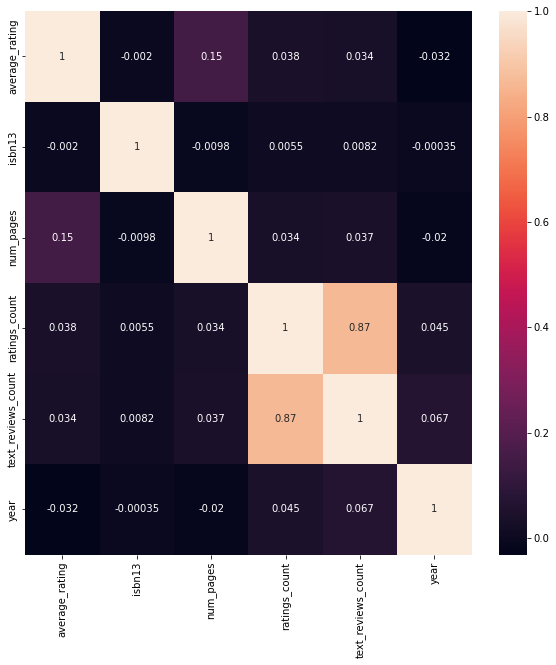

In [14]:
# Numerical columns Analysis

# Heat map to see the correlations

plt.figure(figsize=(10,10))
sns.heatmap(books.corr(),annot=True)
plt.show()

Text(0.5, 0, 'Average rating')

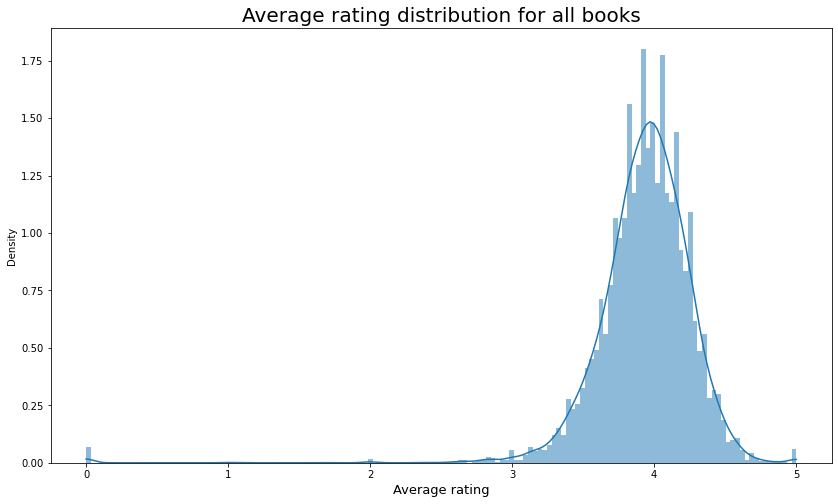

In [15]:
# plot a histogram to 'average_rating', the target column


dist = books
dist['average_rating'] = dist.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[14,8])
sns.histplot(dist['average_rating'],ax=ax, kde=True, stat="density", linewidth=0)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)


In [16]:
# ---- FEATURE ENGINEERING ----

# Case Statement in Pandas

def case_statement_rating(df):
    if (df['average_rating'] <= 5) and (df['average_rating'] > 4):
        return 'between 4 and 5'
    elif (df['average_rating'] <= 4) and (df['average_rating'] > 3):
        return 'between 3 and 4'
    elif (df['average_rating'] <= 3) and (df['average_rating'] > 2):
        return 'between 2 and 3'
    elif (df['average_rating'] <= 2) and (df['average_rating'] > 1):
        return 'between 1 and 2'    
    else:
        return 'between 0 and 1'

books_copy = books.copy()
    
books_copy['ratings_dist'] = books_copy.apply(case_statement_rating, axis=1)


books_copy.head(5)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publisher,year,ratings_dist
bookID,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,Scholastic Inc.,2006,between 4 and 5
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,Scholastic Inc.,2004,between 4 and 5
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,Scholastic,2003,between 4 and 5
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,Scholastic Inc.,2004,between 4 and 5
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,Scholastic,2004,between 4 and 5


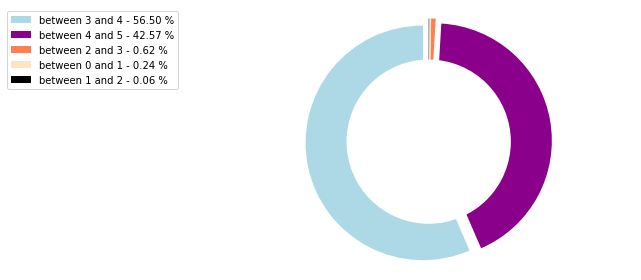

In [17]:
# ratings distributions in pie chart

ratings_pie = books_copy['ratings_dist'].value_counts().reset_index()
labels = ratings_pie['index']
colors = ['lightblue','darkmagenta','coral','bisque', 'black']
percent = 100.*ratings_pie['ratings_dist']/ratings_pie['ratings_dist'].sum()
fig, ax1 = plt.subplots()
ax1.pie(ratings_pie['ratings_dist'],colors = colors, 
        pctdistance=0.85, startangle=90, explode=(0.05, 0.05, 0.05, 0.05, 0.05))
#Draw a circle now:
centre_circle = plt.Circle((0,0), 0.70, fc ='white')
fig1 = plt.gcf()
fig1.gca().add_artist(centre_circle)
#Equal Aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.tight_layout()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percent)]
plt.legend( labels, loc = 'best',bbox_to_anchor=(-0.1, 1.),)

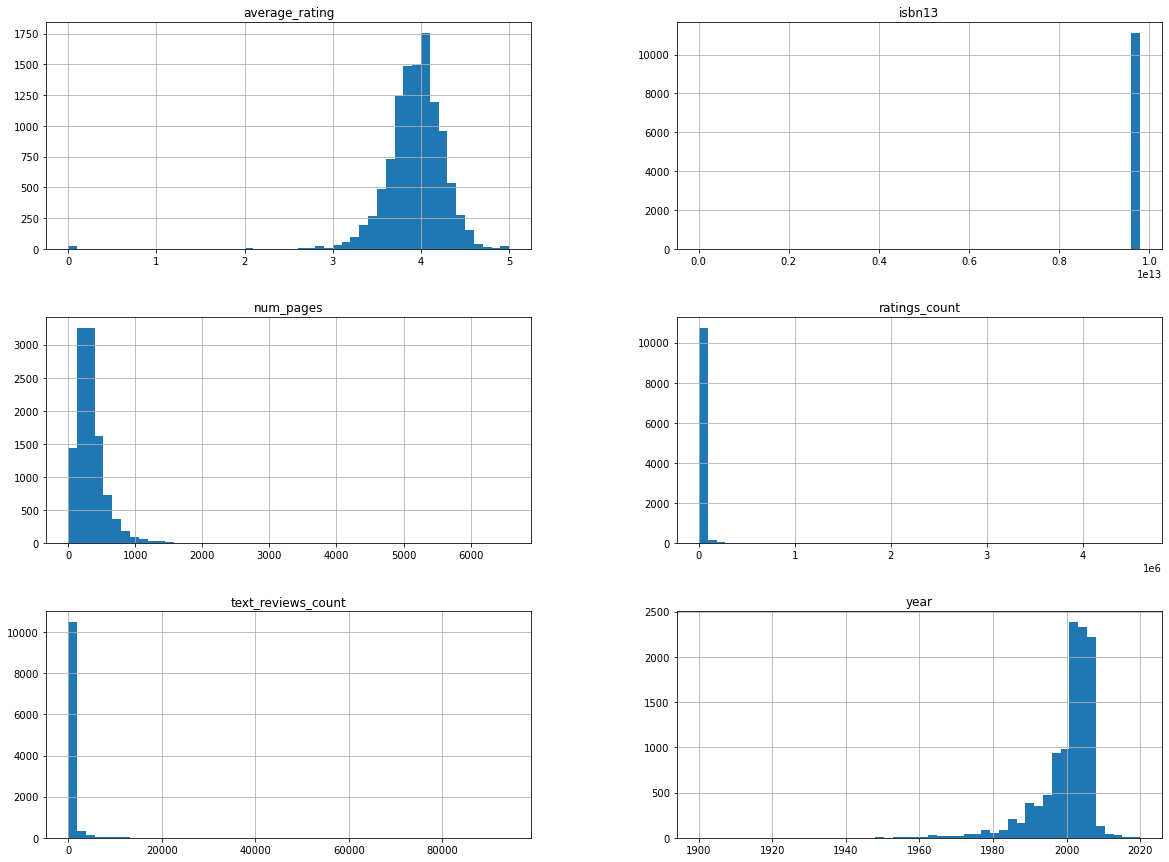

In [18]:
# Histogram

books.hist(bins=50, figsize=(20,15))

plt.show()

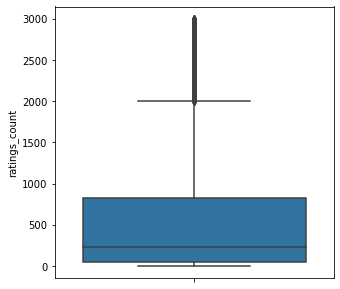

In [19]:
# Box-plots help us to see the outliers

# Box-plots for 'rating_count'

plt.figure(figsize=(5,5))
books_ratingcount_tobox = books[books['ratings_count']<3000]
sns.boxplot(y=books_ratingcount_tobox['ratings_count'])
plt.show()


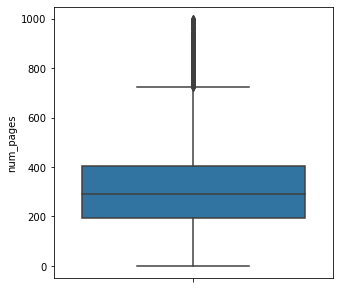

In [20]:
# Box-plots for 'num_pages'

plt.figure(figsize=(5,5))
books_numpages_tobox = books[books['num_pages']<1000]
sns.boxplot(y=books_numpages_tobox['num_pages'])
plt.show()


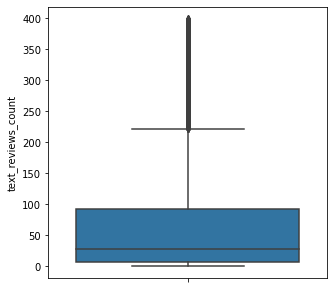

In [21]:
# Box-plots for 'text_reviews_count'

plt.figure(figsize=(5,5))
books_textreviewscount_tobox = books[books['text_reviews_count']<400]
sns.boxplot(y=books_textreviewscount_tobox['text_reviews_count'])
plt.show()

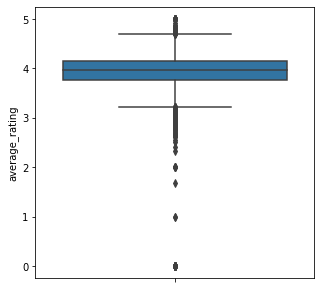

In [22]:
# Box-plots for 'average_rating'

plt.figure(figsize=(5,5))
sns.boxplot(y=books['average_rating'])
plt.show()

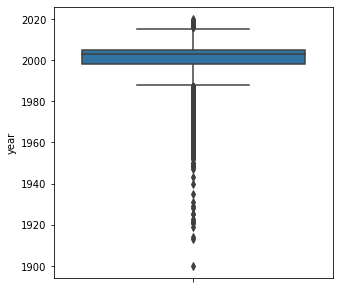

In [23]:
# Box-plots for 'year'

plt.figure(figsize=(5,5))
sns.boxplot(y=books['year'])
plt.show()

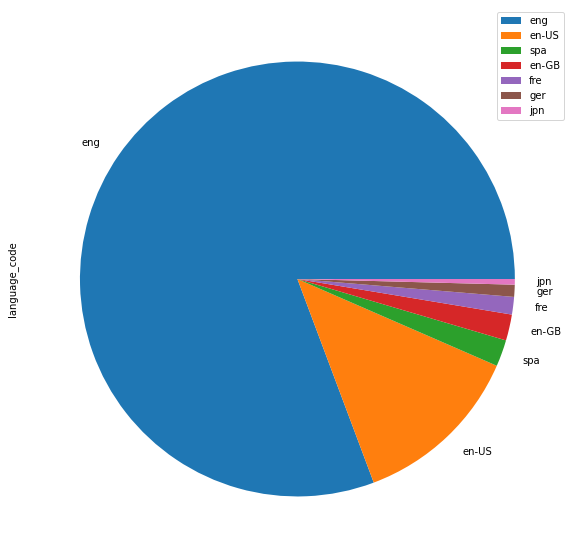

In [24]:
# Categorical columns Analysis

# What is the percentages of the total of 'language_code' ?

books['language_code'].value_counts().head(7).plot(kind = 'pie', figsize=(10, 10)).legend()
plt.show()

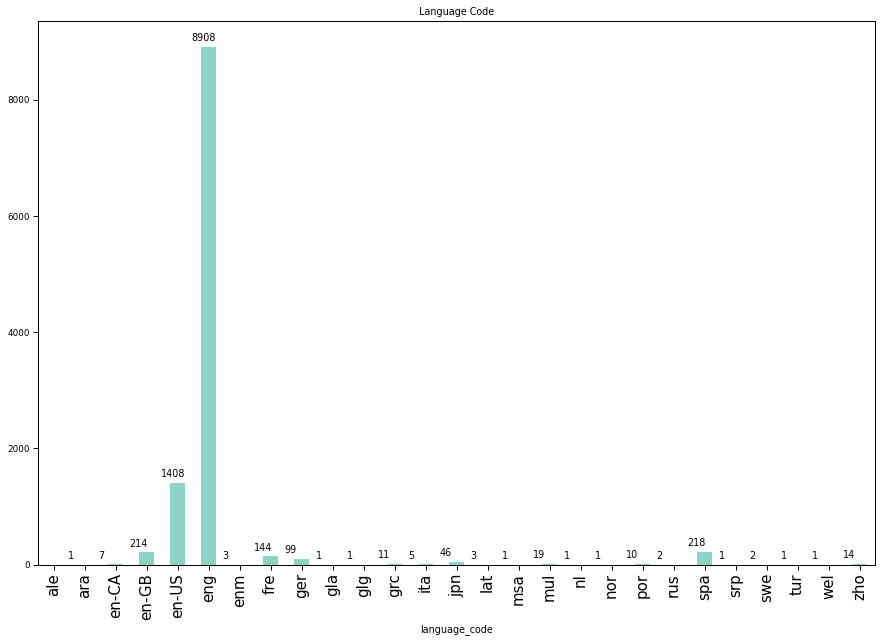

In [25]:
# The distribution of language_code

sns.set_context('paper')
sns.set_palette("Set3")
plt.figure(figsize=(15,10))
ax = languages = books.groupby('language_code')['title'].count().plot.bar()
plt.title('Language Code')
plt.xticks(fontsize = 15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.3, p.get_height()+100))

In [26]:
# ---- FEATURE ENGINEERING ----

# "language_code" may be valuable to show only the 4 most frequent languages in the database and 
# put the rest as 'others'

def case_statement_language(df):
    if (df['language_code'] == 'eng') :
        return 'eng'
    elif (df['language_code'] == 'en-US') :
        return 'en-US'
    elif (df['language_code'] == 'en-GB') :
        return 'en-GB'
    elif (df['language_code'] == 'spa') :
        return 'spa'   
    else:
        return 'others'
    
books['language_code'] = books.apply(case_statement_language, axis=1)

books.head(5)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publisher,year
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,Scholastic Inc.,2006
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,Scholastic Inc.,2004
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,Scholastic,2003
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,Scholastic Inc.,2004
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,Scholastic,2004


In [27]:
# Queries to answer business questions

# What are the top 25 best rated books ?

best_rated = books.sort_values('average_rating',ascending=False).head(25).set_index('title')
best_rated[['average_rating', 'ratings_count']]

,average_rating,ratings_count
title,,
Comoediae 1: Acharenses/Equites/Nubes/Vespae/Pax/Aves,5.00,0
His Princess Devotional: A Royal Encounter With Your King,5.00,2
The Diamond Color Meditation: Color Pathway to the Soul,5.00,5
Tyrannosaurus Wrecks (Stanley #1),5.00,2
The Irish Anatomist: A Study of Flann O'Brien,5.00,1
Bulgakov's the Master and Margarita: The Text as a Cipher,5.00,4
Delwau Duon: Peintiadau Nicholas Evans = Symphonies in Black: The Paintings of Nicholas Evans,5.00,1
Oliver Wendell Holmes in Paris: Medicine Theology and the Autocrat of the Breakfast Table,5.00,1
Willem de Kooning: Late Paintings,5.00,1


In [28]:
# What are the top 25 best rated books with a higher total ratings count than the average 

books_filter_rate = books[books['ratings_count'] > books['ratings_count'].mean()]
best_rated_filter = books_filter_rate.sort_values('average_rating',ascending=False).head(25).set_index('title')
best_rated_filter[['average_rating', 'ratings_count']]

,average_rating,ratings_count
title,,
The Complete Calvin and Hobbes,4.82,32213
Harry Potter Boxed Set Books 1-5 (Harry Potter #1-5),4.78,41428
It's a Magical World (Calvin and Hobbes #11),4.76,23875
Harry Potter Collection (Harry Potter #1-6),4.73,28242
The Days Are Just Packed,4.69,20308
The Calvin and Hobbes Tenth Anniversary Book,4.63,49122
J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings,4.59,101233
The Lord of the Rings: The Art of the Fellowship of the Ring,4.59,26153
Collected Fictions,4.58,18874


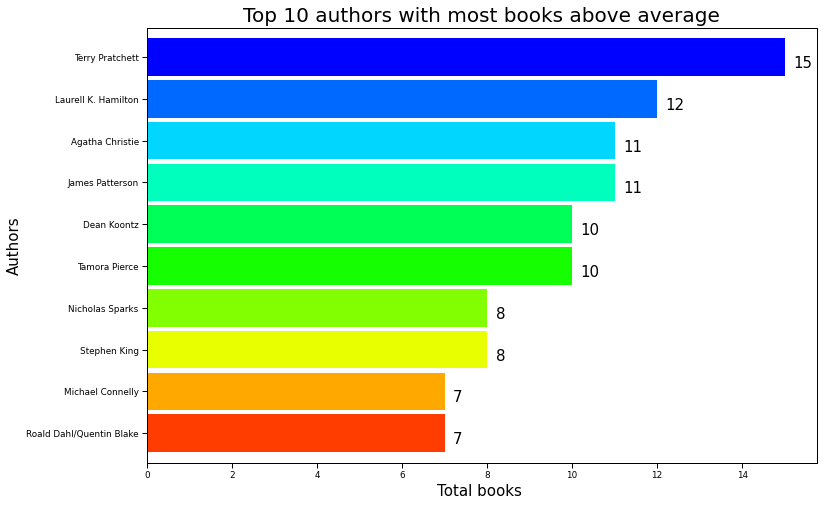

In [29]:
# What are the 10 authors who have more books with average_rate and ratings_count longer than average


books_selected = books[(books['average_rating'] > books['average_rating'].mean()) & (books['ratings_count'] > books['ratings_count'].mean())]
author_of_most_books = books_selected.groupby('authors')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('authors')
plt.subplots(figsize=(12,8))
ax = author_of_most_books['title'].sort_values().plot.barh(width=0.9,color=sns.color_palette('gist_rainbow',12))
ax.set_xlabel("Total books ", fontsize=15)
ax.set_ylabel("Authors", fontsize=15)
ax.set_title("Top 10 authors with most books above average",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

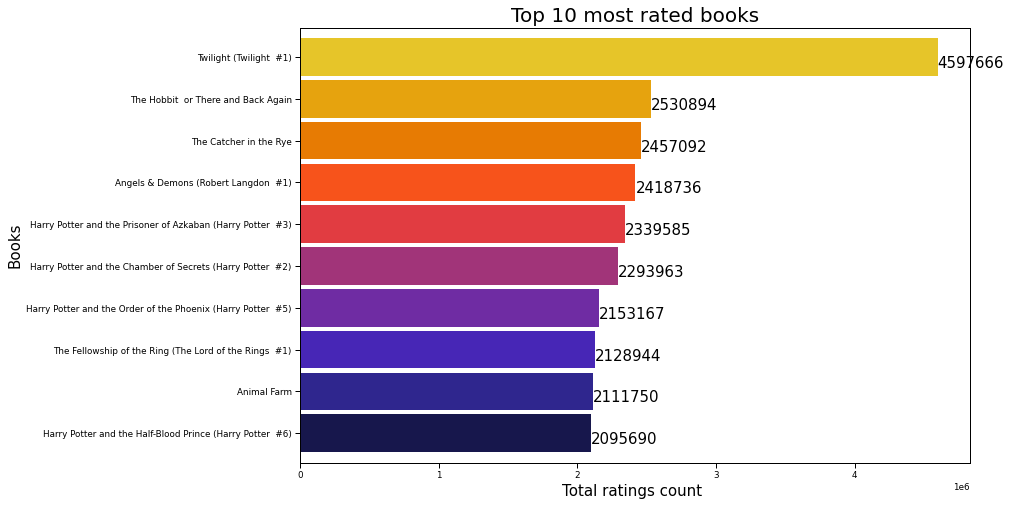

In [30]:
# What is the top 10 most rated books ?

most_rated = books.sort_values('ratings_count',ascending=False).head(10).set_index('title')
plt.subplots(figsize=(12,8))
ax = most_rated['ratings_count'].sort_values().plot.barh(width=0.9,color=sns.color_palette('CMRmap',12))
ax.set_xlabel("Total ratings count ", fontsize=15)
ax.set_ylabel("Books", fontsize=15)
ax.set_title("Top 10 most rated books",fontsize=20,color='black')

# Loop to display the totals

totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+3, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()


Text(0, 0.5, 'Authors')

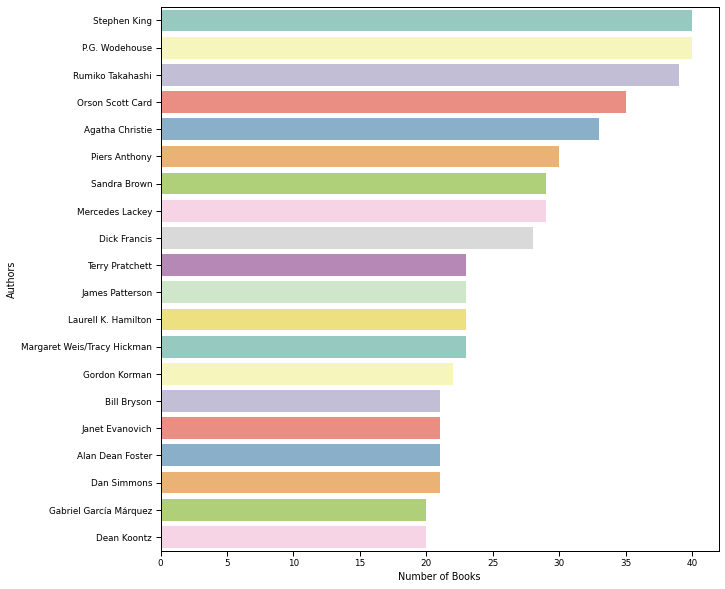

In [31]:
# Top 20 authors who own more books

plt.figure(figsize=(10,10))
plot = sns.countplot(y = "authors", data = books, order = books['authors'].value_counts().iloc[:20].index, palette = "Set3")
plt.xlabel('Number of Books')
plt.ylabel('Authors')

In [32]:
books.describe(include=[object]) 

,title,authors,isbn,language_code,publisher
count,11123,11123,11123,11123,11123
unique,10348,6639,11123,5,2290
top,The Iliad,Stephen King,0439785960,eng,Vintage
freq,9,40,1,8908,318


Text(0, 0.5, 'title')

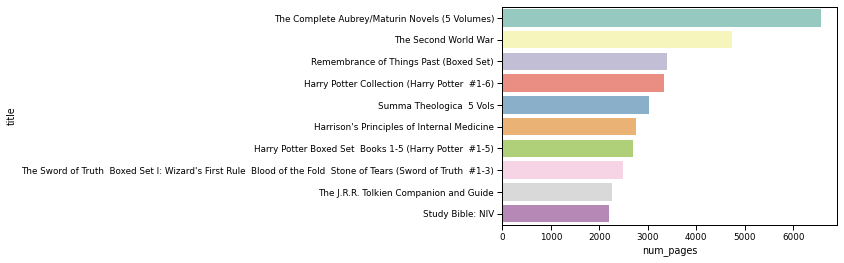

In [33]:
# What is the top 10 longest books ?

longest_books = books.nlargest(10, ['num_pages']).set_index('title')
data_lbooks = longest_books.loc[:,'num_pages']
sns.barplot(x=data_lbooks, y=longest_books.index)
plt.xlabel('num_pages')
plt.ylabel('title')

Text(0.5, 0, 'Number of Publications')

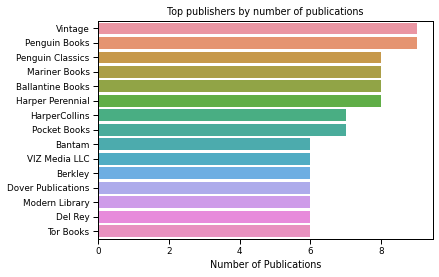

In [34]:
# What is the top 15 publishers by number of publications ?

sns.barplot(x=books['title'].value_counts()[:15], y=books['publisher'].value_counts().index[:15])
plt.title('Top publishers by number of publications')
plt.xlabel('Number of Publications')

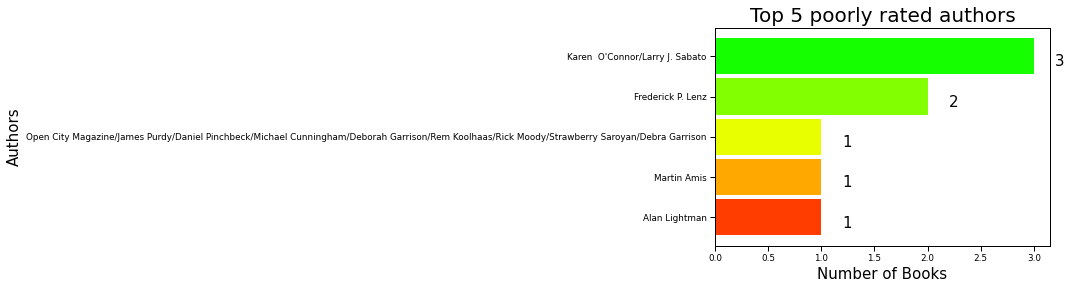

In [35]:
# What is the bottom 5 poorly rated authors (average_rate < 3)?

BadRating = 3
BadRatedAuthors = books[books['average_rating'] <= BadRating]
BadRatedAuthors = BadRatedAuthors.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(5).set_index('authors')
ax = BadRatedAuthors['title'].sort_values().plot.barh(width=0.9,color=sns.color_palette('gist_rainbow',12))
ax.set_xlabel("Number of Books", fontsize=15)
ax.set_ylabel("Authors", fontsize=15)
ax.set_title("Top 5 poorly rated authors",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

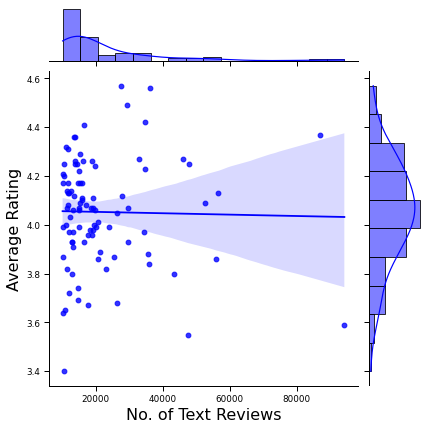

In [36]:
# Did the books with more text reviews receive higher ratings?

data_TextReviewsGreaterThan10K = books[books['text_reviews_count'] > 10000]

ax = sns.jointplot(x="text_reviews_count", y="average_rating", data = data_TextReviewsGreaterThan10K, kind = 'reg', color = 'blue')
ax.set_axis_labels("No. of Text Reviews", "Average Rating", fontsize=16)
plt.show()

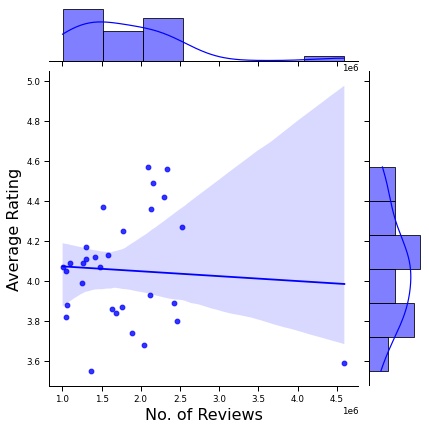

In [37]:
# Did the books with more reviews receive higher ratings?

data_ReviewsGreaterThan1Million = books[books['ratings_count'] > 1000000]
ax = sns.jointplot(x="ratings_count", y="average_rating", data = data_ReviewsGreaterThan1Million, kind = 'reg', color = 'blue')
ax.set_axis_labels("No. of Reviews", "Average Rating",fontsize=16)
plt.show()

In [38]:
# Does a second author ever appear as the first author?

books_mult_authors = books[books['authors'].str.contains('/', regex=True, na=True)].copy()

books_mult_authors.loc[:,'first_author']  = books_mult_authors.loc[:,'authors'].apply(lambda x: x.split("/")[0])
books_mult_authors.loc[:,'second_author'] = books_mult_authors.loc[:,'authors'].apply(lambda x: x.split("/")[1])

second_authors = books_mult_authors.loc[:,'second_author'].unique().tolist()

first_authors = books.loc[:,'authors'].unique().tolist()

count_check = 0

for i in range(0, len(second_authors)):
    for j in range(0, len(first_authors)):
        if second_authors[i]==first_authors[j]:
            count_check = count_check + 1
        else:
            continue
    

print("The second author appears as the first author "+ str(count_check) + " times")   

The second author appears as the first author 331 times


In [39]:
# Data Cleaning

# 'title' has many unique results and it is not possible to observe if it really has 
# relevance in the rating score, so it will be discarded

books = books.drop(columns = 'title', axis = 1)

books.head(10)

,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publisher,year
bookID,,,,,,,,,,
1,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,Scholastic Inc.,2006
2,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,Scholastic Inc.,2004
4,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,Scholastic,2003
5,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,Scholastic Inc.,2004
8,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,Scholastic,2004
9,W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,Nimble Books,2005
10,J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,Scholastic,2005
12,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,Gramercy Books,2005
13,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,Del Rey Books,2002


In [40]:
# check for doublications

books.duplicated().any()

False

In [41]:
# ---- FEATURE ENGINEERING ----

# get_dummies tranforms categorical data to numbers -> language_code

books = pd.concat([books,pd.get_dummies(books['language_code'])],axis=1).drop(columns="language_code")

books.head(10)

,authors,average_rating,isbn,isbn13,num_pages,ratings_count,text_reviews_count,publisher,year,en-GB,en-US,eng,others,spa
bookID,,,,,,,,,,,,,,
1,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,652,2095690,27591,Scholastic Inc.,2006,0,0,1,0,0
2,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,870,2153167,29221,Scholastic Inc.,2004,0,0,1,0,0
4,J.K. Rowling,4.42,0439554896,9780439554893,352,6333,244,Scholastic,2003,0,0,1,0,0
5,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,435,2339585,36325,Scholastic Inc.,2004,0,0,1,0,0
8,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,2690,41428,164,Scholastic,2004,0,0,1,0,0
9,W. Frederick Zimmerman,3.74,0976540606,9780976540601,152,19,1,Nimble Books,2005,0,1,0,0,0
10,J.K. Rowling,4.73,0439827604,9780439827607,3342,28242,808,Scholastic,2005,0,0,1,0,0
12,Douglas Adams,4.38,0517226952,9780517226957,815,3628,254,Gramercy Books,2005,0,0,1,0,0
13,Douglas Adams,4.38,0345453743,9780345453747,815,249558,4080,Del Rey Books,2002,0,0,1,0,0


In [42]:
# split data in train and test

from sklearn.model_selection import train_test_split

books_train, books_test = train_test_split(books,test_size = 0.25)

books_train

,authors,average_rating,isbn,isbn13,num_pages,ratings_count,text_reviews_count,publisher,year,en-GB,en-US,eng,others,spa
bookID,,,,,,,,,,,,,,
34081,T.S. Eliot/Lawrence Rainey,4.11,0300119941,9780300119947,304,227,23,Yale University Press,2006,0,0,1,0,0
5027,Alma Flor Ada/Elivia Savadier,4.05,068987409X,9780689874093,32,34,10,Atheneum Books for Young Readers,2004,0,1,0,0,0
14177,Pearson Scott Foresman/William S. Gray,4.13,0448433400,9780448433400,200,371,43,Grosset & Dunlap,2003,0,1,0,0,0
1426,Paulo Coelho,3.70,0060527986,9780060527983,142,22662,945,HarperOne,2004,0,1,0,0,0
35878,Masaki Yamada/Yuji Oniki/Carl Gustav Horn/Daig...,3.97,1421513943,9781421513942,196,21,3,VIZ Media LLC,2007,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16544,Charles de Lint/Robin Wayne Bailey/Philip José...,3.50,0743458532,9780743458535,608,50,0,iBooks,2003,0,0,1,0,0
29597,Donald Miller,3.92,0785209824,9780785209829,256,8931,444,Thomas Nelson,2005,0,0,1,0,0
34915,Terry Brooks,3.97,1857236076,9781857236071,503,72,3,Orbit Books,1998,0,0,1,0,0


In [43]:
books_test

,authors,average_rating,isbn,isbn13,num_pages,ratings_count,text_reviews_count,publisher,year,en-GB,en-US,eng,others,spa
bookID,,,,,,,,,,,,,,
13985,Mercedes Lackey/Roberta Gellis,3.90,1416521070,9781416521075,544,698,19,Baen,2007,0,0,1,0,0
23461,Elizabeth A. Lynn,3.57,0743498097,9780743498098,224,646,35,iBooks,2004,0,0,1,0,0
10105,Carolly Erickson,3.89,0312352182,9780312352189,326,10702,366,St. Martin's Press,2006,0,1,0,0,0
29519,Kurt Eichenwald,4.23,0767911792,9780767911795,784,4511,309,Broadway Books,2005,0,0,1,0,0
12293,Jo Ann Ooiman Robinson,4.25,031229543X,9780312295431,336,4,1,Palgrave Macmillan,2005,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13357,Prima Publishing,3.98,0761555528,9780761555520,176,120,1,Prima Games,2006,0,0,1,0,0
37241,David Lubar,3.80,0618439099,9780618439096,272,911,118,HMH Books for Young Readers,2004,0,0,1,0,0
8533,Dick Francis,3.82,0425196739,9780425196731,288,2215,60,G.P. Putnam's Sons,2004,0,1,0,0,0


In [44]:
print(books['average_rating'].mean())
print(books_train['average_rating'].mean())
print(books_test['average_rating'].mean())

3.934075339386829
3.9314756653080836
3.9418734268248805


In [45]:
print(books['num_pages'].mean())
print(books_train['num_pages'].mean())
print(books_test['num_pages'].mean())

336.4055560550211
336.86753776072885
335.019777058612


In [46]:
print(books['text_reviews_count'].mean())
print(books_train['text_reviews_count'].mean())
print(books_test['text_reviews_count'].mean())

542.048098534568
563.5985375209782
477.40453074433657


In [47]:
print(books['year'].mean())
print(books_train['year'].mean())
print(books_test['year'].mean())

2000.16901914951
2000.2344761448094
1999.972671700827


In [48]:
print(books['en-US'].mean())
print(books_train['en-US'].mean())
print(books_test['en-US'].mean())

0.12658455452665648
0.12479021817309997
0.13196691837468535


In [49]:
# get the values of the columns for the training data

X_train = books_train.copy()
y_train = X_train.pop("average_rating")

In [50]:
# get the values of the columns for the test data

X_test = books_test.copy()
y_test = X_test.pop("average_rating")

In [51]:
# DATA PROCESSING

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# a function for getting all categorical_columns and numerical_columns
def get_categorical_columns(df):
    categorical_columns_selector = selector(dtype_include=object)
    categorical_columns = categorical_columns_selector(df)
    return categorical_columns
def get_numerical_columns(df):
    numerical_columns_selector = selector(dtype_exclude=object)
    numerical_columns = numerical_columns_selector(df)
    return numerical_columns

# a function for Transformation the data
def my_transformation(df):
    df = df.copy()
    
    numerical_columns = get_numerical_columns(df)
    nominal_columns = get_categorical_columns(df)

    
    # scale the data is standardize features by removing the mean and scaling to unit variance.
    
    numerical_pipeline = Pipeline([('scaler', StandardScaler())])
    nominal_pipeline = Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))])
   
    # Column Transformer -> list of tuples -> (name, transformer, columns) 
    preprocessor = ColumnTransformer([
        ('numerical_transformer', numerical_pipeline, numerical_columns),
        ('nominal_transformer', nominal_pipeline, nominal_columns),
    ])
    
    # create columns, create transformers after create columntransformer to fit the dataframe
    preprocessor.fit(df)
    
    return preprocessor


preprocessor= my_transformation(X_train)
X_train_prepared = preprocessor.transform(X_train)
X_train_prepared.shape

(8342, 15582)

In [52]:
X_test_prepared = preprocessor.transform(X_test)
X_test_prepared.shape

(2781, 15582)

In [53]:
# -- MODEL TRAINNING --

# Import Machine Learning Models

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge

random_forrest = RandomForestRegressor()
linear_regression = LinearRegression()
mlpregressor = MLPRegressor(hidden_layer_sizes=5, max_iter=100, activation='relu', random_state=1, learning_rate_init=0.01)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
ridge = Ridge(alpha=1.0)

In [54]:
# here we train the model on the prepared or the training data

linear_regression.fit(X=X_train_prepared,y=y_train)
random_forrest.fit(X=X_train_prepared,y=y_train)
mlpregressor.fit(X=X_train_prepared,y=y_train)
svr_lin.fit(X=X_train_prepared,y=y_train)
ridge.fit(X=X_train_prepared,y=y_train)

Ridge()

In [55]:
# here we use the model to predict X_test

y_test_pred_linear_regression = linear_regression.predict(X_test_prepared)
y_test_pred_random_forrest = random_forrest.predict(X_test_prepared)
y_test_pred_mlp= mlpregressor.predict(X_test_prepared)
y_test_pred_svr= svr_lin.predict(X_test_prepared)
y_test_pred_ridge= ridge.predict(X_test_prepared)

In [56]:
#  -- MODEL EVALUATION --

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score


# Check Model Score
print("-- LINEAR REGRESSION --")
print("Mean Absolute Error: ", str(mean_absolute_error(y_pred=y_test_pred_linear_regression,y_true=y_test)))
print("Residual sum of squares: ",  np.mean((y_test_pred_linear_regression - y_test) ** 2))
print('RMSE: '+str(np.sqrt(mean_squared_error(y_test, y_test_pred_linear_regression))))
print("-----------------------------------------------------------------------------------------")
print("-- RANDOM FORREST --")
print("Mean Absolute Error: ", str(mean_absolute_error(y_pred=y_test_pred_random_forrest,y_true=y_test)))
print("Residual sum of squares: ",  np.mean((y_test_pred_random_forrest - y_test) ** 2))
print('RMSE: '+str(np.sqrt(mean_squared_error(y_test, y_test_pred_random_forrest))))
print("-----------------------------------------------------------------------------------------")
print("-- MLP REGRESSOR --")
print("Mean Absolute Error: ", str(mean_absolute_error(y_pred=y_test_pred_mlp,y_true=y_test)))
print("Residual sum of squares: ",  np.mean((y_test_pred_mlp - y_test) ** 2))
print('RMSE: '+str(np.sqrt(mean_squared_error(y_test, y_test_pred_mlp))))
print("-----------------------------------------------------------------------------------------")
print("-- SUPPORT VECTOR REGRESSOR --")
print("Mean Absolute Error: ", str(mean_absolute_error(y_pred=y_test_pred_svr,y_true=y_test)))
print("Residual sum of squares: ",  np.mean((y_test_pred_svr - y_test) ** 2))
print('RMSE: '+str(np.sqrt(mean_squared_error(y_test, y_test_pred_svr))))
print("-----------------------------------------------------------------------------------------")
print("-- RIDGE --")
print("Mean Absolute Error: ", str(mean_absolute_error(y_pred=y_test_pred_ridge,y_true=y_test)))
print("Residual sum of squares: ",  np.mean((y_test_pred_ridge - y_test) ** 2))
print('RMSE: '+str(np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))))
print("-----------------------------------------------------------------------------------------")

-- LINEAR REGRESSION --
Mean Absolute Error:  0.19157158931481774
Residual sum of squares:  0.10005303389791356
RMSE: 0.3163116088573314
-----------------------------------------------------------------------------------------
-- RANDOM FORREST --
Mean Absolute Error:  0.19807687882056815
Residual sum of squares:  0.09061661019777065
RMSE: 0.3010259294442434
-----------------------------------------------------------------------------------------
-- MLP REGRESSOR --
Mean Absolute Error:  0.2204988476624571
Residual sum of squares:  0.1170362714370665
RMSE: 0.3421056436790639
-----------------------------------------------------------------------------------------
-- SUPPORT VECTOR REGRESSOR --
Mean Absolute Error:  0.1982572449871033
Residual sum of squares:  0.10150891674452586
RMSE: 0.31860464018046836
-----------------------------------------------------------------------------------------
-- RIDGE --
Mean Absolute Error:  0.19295841127568097
Residual sum of squares:  0.099678454263